In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from glob import iglob
from math import log, floor
import os
import re
import pickle

%reload_ext autoreload
%autoreload 2

from plot_utils import *

## Scatter Plot of Maximum Concurrent Flow

In [2]:
from scatter_plot.plot_scatter_plot import scatter
from mcf_cdfs.plot_mcf_cdfs import get_ratio_dataframes

In [3]:
def pop_random_scatter(path_form_csv, pop_csv, query_str, title):
    ratio_dfs = get_ratio_dataframes(path_form_csv, pop_csv)
    plot_dfs = [df.query(query_str) if query_str is not None else df
                for df in ratio_dfs[0:2]]
    scatter(plot_dfs,
            ["KDL", "Non-KDL"],
            ["nc", "smore", "pf"],
            "speedup_ratio",
            "flow_ratio",
            xlim=None,
            ylim=(0.0, 1.1),
            figsize=(7.5, 4),
            xlabel='Speedup ratio (to original)',
            ylabel='Min. fractional flow\nratio (to original)',
            bbta=(0, 0, 1, 2.35),
            ncol=2,
            xlog=True,
            save=True)

In [4]:
path_form_csv = 'max_concurrent_flow/path-form-mcf-slice_0.csv'
pop_csv = 'max_concurrent_flow/pop-mcf-slice_0.csv'

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             bimodal     127569293           1.0    1.000000   
1   Kdl.graphml             bimodal    1243366308           2.0    1.000000   
2   Kdl.graphml             bimodal    1238850944           4.0    1.000000   
3   Kdl.graphml             bimodal    2041644917           8.0    1.000000   
4   Kdl.graphml             bimodal    1047347487          16.0    0.972510   
5   Kdl.graphml             bimodal    1062062353          32.0    0.978030   
6   Kdl.graphml             bimodal     127701462          64.0    0.966046   
7   Kdl.graphml             bimodal    1258490337         128.0    0.969908   
8   Kdl.graphml             gravity    1947258216           1.0    1.000000   
9   Kdl.graphml             gravity    1640115421           2.0    1.000000   
10  Kdl.graphml             gravity     102333321           4.0    1.000000   
11  Kdl.graphml             gravity    1876254433   

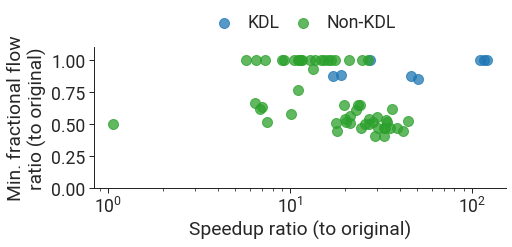

In [5]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'poisson-high-intra'", "Poisson, High Intra")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             bimodal     127569293           1.0    1.000000   
1   Kdl.graphml             bimodal    1243366308           2.0    1.000000   
2   Kdl.graphml             bimodal    1238850944           4.0    1.000000   
3   Kdl.graphml             bimodal    2041644917           8.0    1.000000   
4   Kdl.graphml             bimodal    1047347487          16.0    0.972510   
5   Kdl.graphml             bimodal    1062062353          32.0    0.978030   
6   Kdl.graphml             bimodal     127701462          64.0    0.966046   
7   Kdl.graphml             bimodal    1258490337         128.0    0.969908   
8   Kdl.graphml             gravity    1947258216           1.0    1.000000   
9   Kdl.graphml             gravity    1640115421           2.0    1.000000   
10  Kdl.graphml             gravity     102333321           4.0    1.000000   
11  Kdl.graphml             gravity    1876254433   

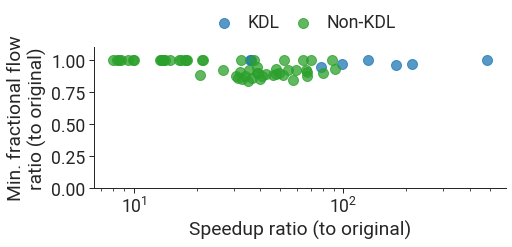

In [6]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'poisson-high-inter'", "Poisson, High Inter")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             bimodal     127569293           1.0    1.000000   
1   Kdl.graphml             bimodal    1243366308           2.0    1.000000   
2   Kdl.graphml             bimodal    1238850944           4.0    1.000000   
3   Kdl.graphml             bimodal    2041644917           8.0    1.000000   
4   Kdl.graphml             bimodal    1047347487          16.0    0.972510   
5   Kdl.graphml             bimodal    1062062353          32.0    0.978030   
6   Kdl.graphml             bimodal     127701462          64.0    0.966046   
7   Kdl.graphml             bimodal    1258490337         128.0    0.969908   
8   Kdl.graphml             gravity    1947258216           1.0    1.000000   
9   Kdl.graphml             gravity    1640115421           2.0    1.000000   
10  Kdl.graphml             gravity     102333321           4.0    1.000000   
11  Kdl.graphml             gravity    1876254433   

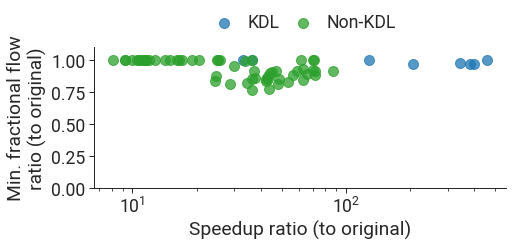

In [7]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'uniform'", "Uniform")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             bimodal     127569293           1.0    1.000000   
1   Kdl.graphml             bimodal    1243366308           2.0    1.000000   
2   Kdl.graphml             bimodal    1238850944           4.0    1.000000   
3   Kdl.graphml             bimodal    2041644917           8.0    1.000000   
4   Kdl.graphml             bimodal    1047347487          16.0    0.972510   
5   Kdl.graphml             bimodal    1062062353          32.0    0.978030   
6   Kdl.graphml             bimodal     127701462          64.0    0.966046   
7   Kdl.graphml             bimodal    1258490337         128.0    0.969908   
8   Kdl.graphml             gravity    1947258216           1.0    1.000000   
9   Kdl.graphml             gravity    1640115421           2.0    1.000000   
10  Kdl.graphml             gravity     102333321           4.0    1.000000   
11  Kdl.graphml             gravity    1876254433   

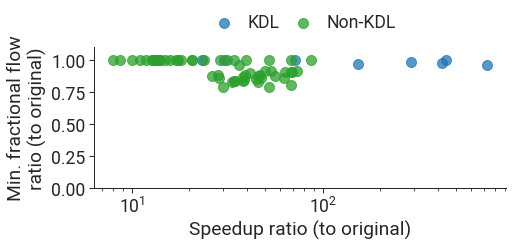

In [8]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'gravity'", "Gravity")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             bimodal     127569293           1.0    1.000000   
1   Kdl.graphml             bimodal    1243366308           2.0    1.000000   
2   Kdl.graphml             bimodal    1238850944           4.0    1.000000   
3   Kdl.graphml             bimodal    2041644917           8.0    1.000000   
4   Kdl.graphml             bimodal    1047347487          16.0    0.972510   
5   Kdl.graphml             bimodal    1062062353          32.0    0.978030   
6   Kdl.graphml             bimodal     127701462          64.0    0.966046   
7   Kdl.graphml             bimodal    1258490337         128.0    0.969908   
8   Kdl.graphml             gravity    1947258216           1.0    1.000000   
9   Kdl.graphml             gravity    1640115421           2.0    1.000000   
10  Kdl.graphml             gravity     102333321           4.0    1.000000   
11  Kdl.graphml             gravity    1876254433   

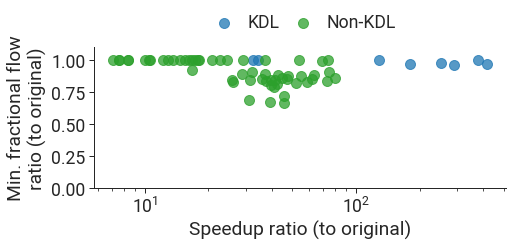

In [9]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'bimodal'", "Bimodal")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             bimodal     127569293           1.0    1.000000   
1   Kdl.graphml             bimodal    1243366308           2.0    1.000000   
2   Kdl.graphml             bimodal    1238850944           4.0    1.000000   
3   Kdl.graphml             bimodal    2041644917           8.0    1.000000   
4   Kdl.graphml             bimodal    1047347487          16.0    0.972510   
5   Kdl.graphml             bimodal    1062062353          32.0    0.978030   
6   Kdl.graphml             bimodal     127701462          64.0    0.966046   
7   Kdl.graphml             bimodal    1258490337         128.0    0.969908   
8   Kdl.graphml             gravity    1947258216           1.0    1.000000   
9   Kdl.graphml             gravity    1640115421           2.0    1.000000   
10  Kdl.graphml             gravity     102333321           4.0    1.000000   
11  Kdl.graphml             gravity    1876254433   

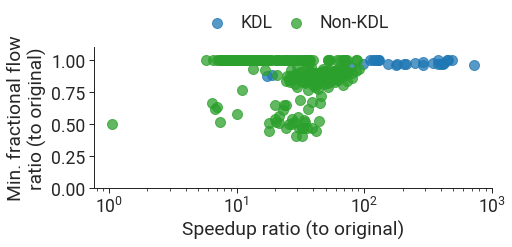

In [10]:
pop_random_scatter(path_form_csv, pop_csv,
                   None, "all")